# 2차원 데이터 시각화

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

2차원 데이터를 시각화하는 다양한 방식을 소개한다.

## 서브플롯 관리

50명 학생의 영어와 수학 점수를 포함하는 2차원 데이터를 이용하여
두 종류의 점수를 활용한 산점도를 다음과 같이 간단하게 그릴 수 있다.
먼저 데이터를 불러온다.

In [7]:
# 데이터 불러오기
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')

# 영어 점수와 수학 점수 구분
eng_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

동일한 산점도를 그리는 코드 두 개를 소개한다.
코드에 사용된 각각의 명령문의 역할은 주석으로 설명된다.

**그래프 코드 1**

아래 코드는 생성되는 모든 그래프의 크기를 미리 설정한다.

In [8]:
plt.rc('figure', figsize=(6, 5))

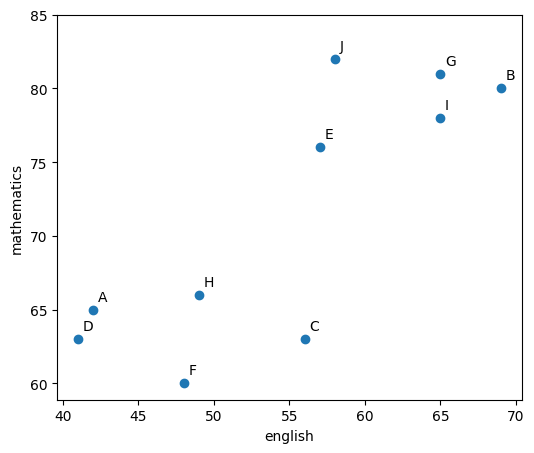

In [9]:
# 산점도 그리기
plt.scatter(eng_scores[:10], math_scores[:10])

# 축 이름 지정
plt.xlabel('english')
plt.ylabel('mathematics')

# 10명 학생 데이터 각각에 이름 추가
names = list('ABCDEFGHIJ')
for i, name in enumerate(names):
    plt.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
plt.xticks(range(40, 75, 5))
plt.yticks(range(60, 90, 5))

# 준비된 모든 그래프 한꺼번에 보여주기
plt.show()

**그래프 코드 2**

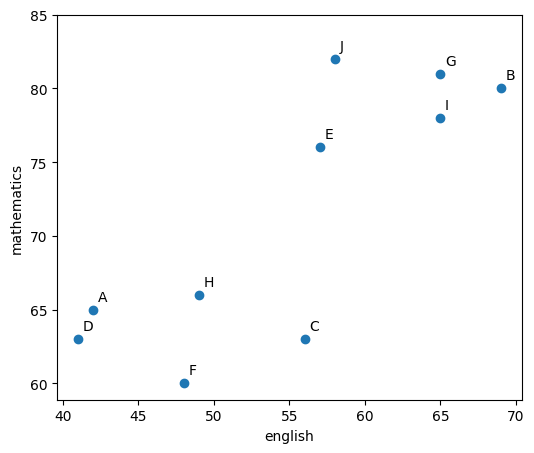

In [10]:
# Figure 객체 지정
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)

# 산점도 그리기
ax.scatter(eng_scores[:10], math_scores[:10])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 10명 학생 데이터 각각에 이름 추가
names = list('ABCDEFGHIJ')
for i, name in enumerate(names):
    ax.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
ax.set_xticks(range(40, 75, 5))
ax.set_yticks(range(60, 90, 5))

# 준비된 모든 그래프 한꺼번에 보여주기
plt.show()

두 그래프 코드의 차이점은 `Figure` 객체와 서브플롯의 활용에 있다.

**`Figure` 객체**

`Figure` 객체는 다음과 생성하며 그림 액작의 기능을 수행한다.

```python
fig = plt.figure(figsize=(6,5))
```

위 코드에서 `figsize=(6,5)`는 생성되는 그래프의 크기를 지정한다.
이렇게 하면 앞서 아래 방식으로 지정된 그래프의 크기와 다른 그래프를 필요할 때마다 지정할 수 있다.

```python
plt.rc('figure', figsize=(6, 5))
```

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures.png?raw=true" style="width:550px"></div></p>

그림 출처: [Matplotlib에서 Figure와 Axes 이해하기 (Basic)](https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic)

**서브플롯 추가**

서브플롯<font size='2'>subplot</font>은 그래프를 그릴 때 필요한 도화지에 해당한다.
아래 코드는 준비된 `Figure` 객체에 하나의 서브플롯을 추가한다.

```python
ax = fig.add_subplot(1, 1, 1)
```

위 코드는 다음과 같이 액자에 한 장의 도화지를 준비한 것과 동일하다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures_subplots.png?raw=true" style="width:670px"></div></p>

그림 출처: [Matplotlib에서 Figure와 Axes 이해하기 (Basic)](https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic)

반면에 아래 코드는 두 개의 서브플롯을 추가한다.

```python
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
```

위 코드는 액자에 두 장의 도화지를 좌우로 배치시키는 효과를 낸다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures_subplots121.png?raw=true" style="width:670px"></div></p>

그림 출처: [Matplotlib에서 Figure와 Axes 이해하기 (Basic)](https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic)

**`add_subplot()` 메서드의 인자**

`add_subplot()` 함수는 서브플롯을 행렬 모양으로 배치시킬 때 필요한 세 개의 정보를 인자로 받는다.

- 첫째와 둘째 인자: 도화지 배치를 지정하는 행렬의 크기
- 셋째 인자: 생성되는 서브플롯의 인덱스. 1부터 시작.

**`Axes` 객체**

`ax1`과 `ax2` 두 변수는 (1, 2) 모양으로 배치된 두 개의 서브플롯 각각의 위치 정보를 가리키는 `Axes` 객체다.

- `ax1`: (1, 2) 모양으로 배치된 두 개의 서브플롯 중에서 첫째, 즉 왼편에 위치한 서브플롯의 위치 정보
- `ax2`: (1, 2) 모양으로 배치된 두 개의 서브플롯 중에서 둘째, 즉 오른편에 위치한 서브플롯의 위치 정보

**그래프 삽입하기**

특정 서브플롯에 그래프를 그리려면 해당 서브플롯의 위치 정보를 가리키는 
`ax1` 또는 `ax2`를 선택하여 `scatter()`와 같은 함수를 호출한다.
예를 아래 코드는 10명 학생의 산점도와 함께 50명 전체의 산점도를 좌우로 나란히 배치시킨다.

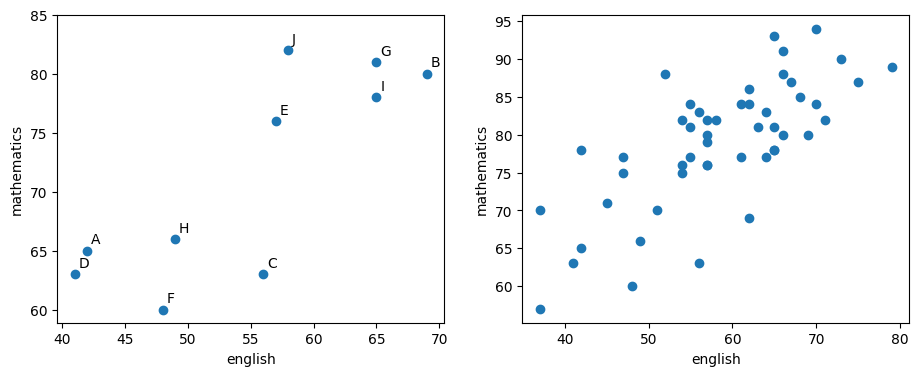

In [11]:
# Figure 객체 지정
fig = plt.figure(figsize=(11, 4))

# 왼쪽 도화지 지정
ax1 = fig.add_subplot(1, 2, 1)

# 오른쪽 도화지 지정
ax2 = fig.add_subplot(1, 2, 2)

# 왼쪽 도화지에 10명의 산점도 그리기
ax1.scatter(eng_scores[:10], math_scores[:10])
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')

# 10명 학생 데이터 각각에 이름 추가
names = list('ABCDEFGHIJ')
for i, name in enumerate(names):
    ax1.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
ax1.set_xticks(range(40, 75, 5))
ax1.set_yticks(range(60, 90, 5))
    
# 오른쪽 도화지에 50명의 산점도 그리기
ax2.scatter(eng_scores, math_scores)

# x-축, y-축 이름 지정
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')

plt.show()

반면에 아래 코드는 두 개의 서브플롯을 위 아래로 배치시킨다.
`add_subplot()` 함수의 인자가 `(2, 1, 1)`와 `(2, 1, 2)`가 사용됨에 주의한다.

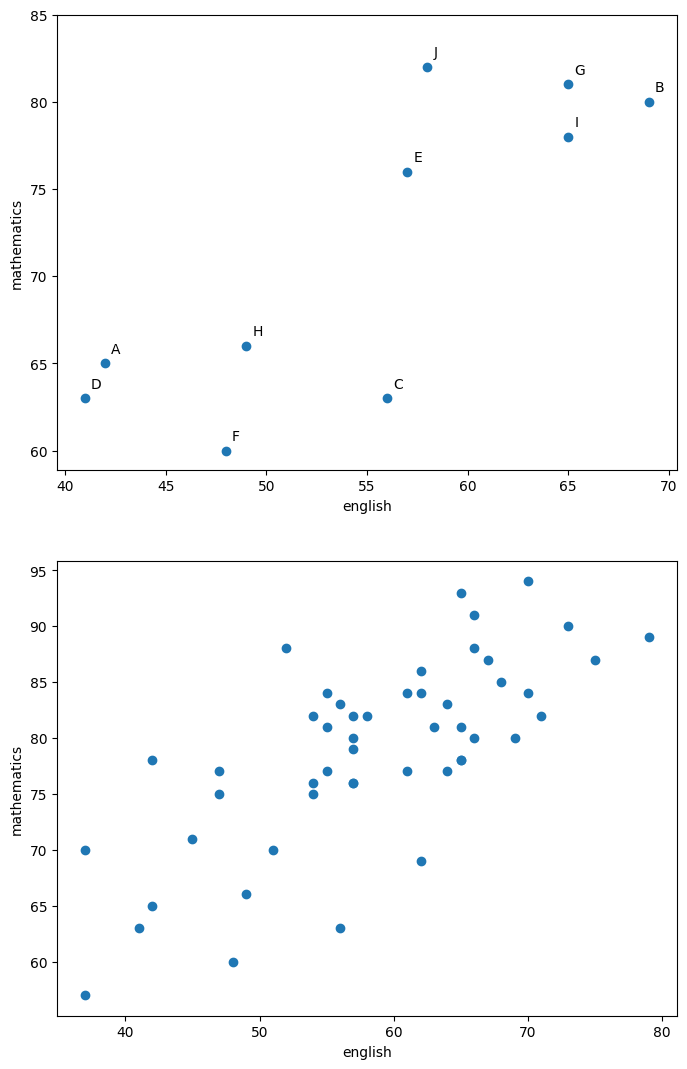

In [12]:
# Figure 객체 지정
fig = plt.figure(figsize=(8, 13))

# 위쪽 도화지 지정
ax1 = fig.add_subplot(2, 1, 1)
# 아래쪽 도화지 지정
ax2 = fig.add_subplot(2, 1, 2)


# 왼쪽 도화지에 10명의 산점도 그리기
ax1.scatter(eng_scores[:10], math_scores[:10])
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')

# 10명 학생 데이터 각각에 이름 추가
names = list('ABCDEFGHIJ')
for i, name in enumerate(names):
    ax1.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
ax1.set_xticks(range(40, 75, 5))
ax1.set_yticks(range(60, 90, 5))
    
# 오른쪽 도화지에 50명의 산점도 그리기
ax2.scatter(eng_scores, math_scores)

# x-축, y-축 이름 지정
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')

plt.show()

## 선형 회귀

50명의 영어와 수학 점수를 이용한 산점도만 따로 확인하면 다음과 같다.

- 50명의 점수를 가장 잘 대변하는 직선은 다음과 같이 구한다.


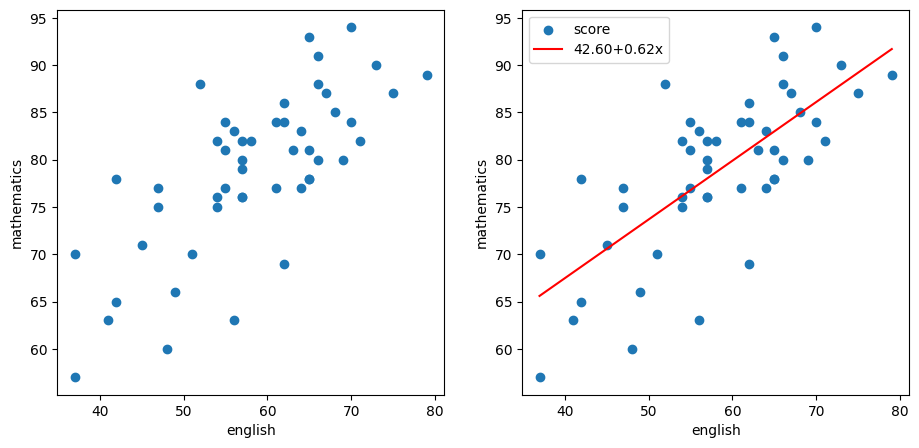

In [13]:
# Figure 객체 지정
fig = plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

## 왼편: 단순 산점도

ax1.scatter(eng_scores, math_scores)

ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')

# 산점도
ax2.scatter(eng_scores, 
            math_scores, 
            label='score')

# 산점도 데이터를 가장 잘 대변하는 직선의 기울기와 절편
poly_fit = np.polyfit(eng_scores, math_scores, 1)

## 오른편: 산점도 + 회귀 직선

# 기울기와 절편을 이용한 1차 함수 지정
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x-좌표 생성
xs = np.linspace(eng_scores.min(), eng_scores.max())
# xs에 대응하는 y-좌표
ys = poly_1d(xs)

# 직선 그리기
ax2.plot(xs, 
         ys, 
         color='red', 
         label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')

# 범례의 표시
ax2.legend(loc='upper left')

plt.show()

## 히트맵

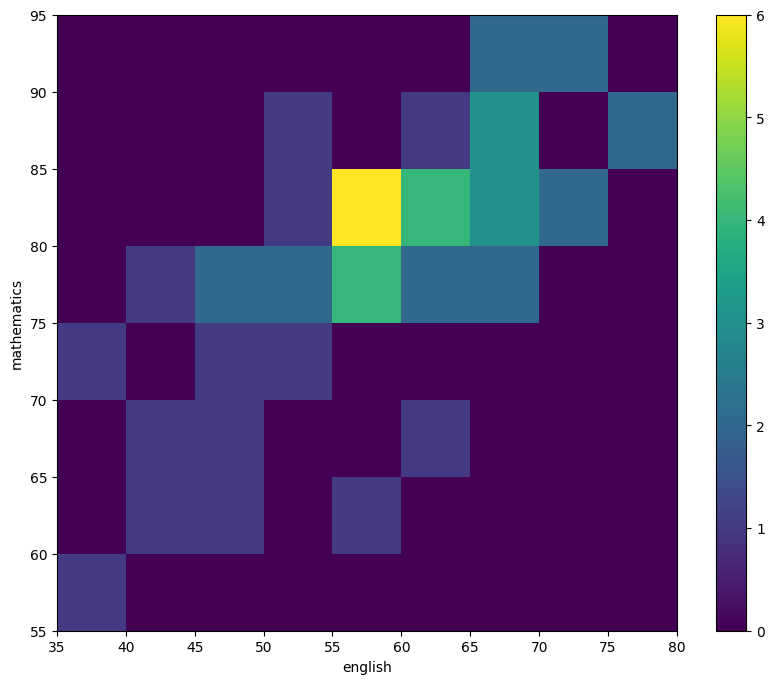

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_scores,
              math_scores,
              bins=[9, 8], 
              range=[(35, 80), (55, 95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)

plt.show()

## 예제: 앤스컴의 데이터 4중주

In [15]:
anscombe_data = pd.read_csv(data_url+'anscombe.csv')

anscombe_data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [16]:
anscombe_data.describe()

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


**`(xi, yi)` 를 담은 네 개의 어레이**

- 방식 0: 네 개의 변수 선언

In [17]:
data1 = anscombe_data.iloc[:, [0, 4]]
data2 = anscombe_data.iloc[:, [1, 5]]
data3 = anscombe_data.iloc[:, [2, 6]]
data4 = anscombe_data.iloc[:, [3, 7]]

- 방식 1: 리스트 조건제시법<font size='2'>list comprehension</font> 활용

In [18]:
anscombe_arr = np.array([anscombe_data.iloc[:, [i, i+4]] for i in range(4)])

In [19]:
data1 = anscombe_arr[0]
data2 = anscombe_arr[1]
data3 = anscombe_arr[2]
data4 = anscombe_arr[3]

- 방식 2: `for` 반복문 활용

In [20]:
anscombe_arr = np.zeros((4, 11, 2))

for i in range(4):
    anscombe_arr[i] = anscombe_data.iloc[:, [i, i+4]]

In [21]:
data1 = anscombe_arr[0]
data2 = anscombe_arr[1]
data3 = anscombe_arr[2]
data4 = anscombe_arr[3]

**산점도와 선형 회귀**

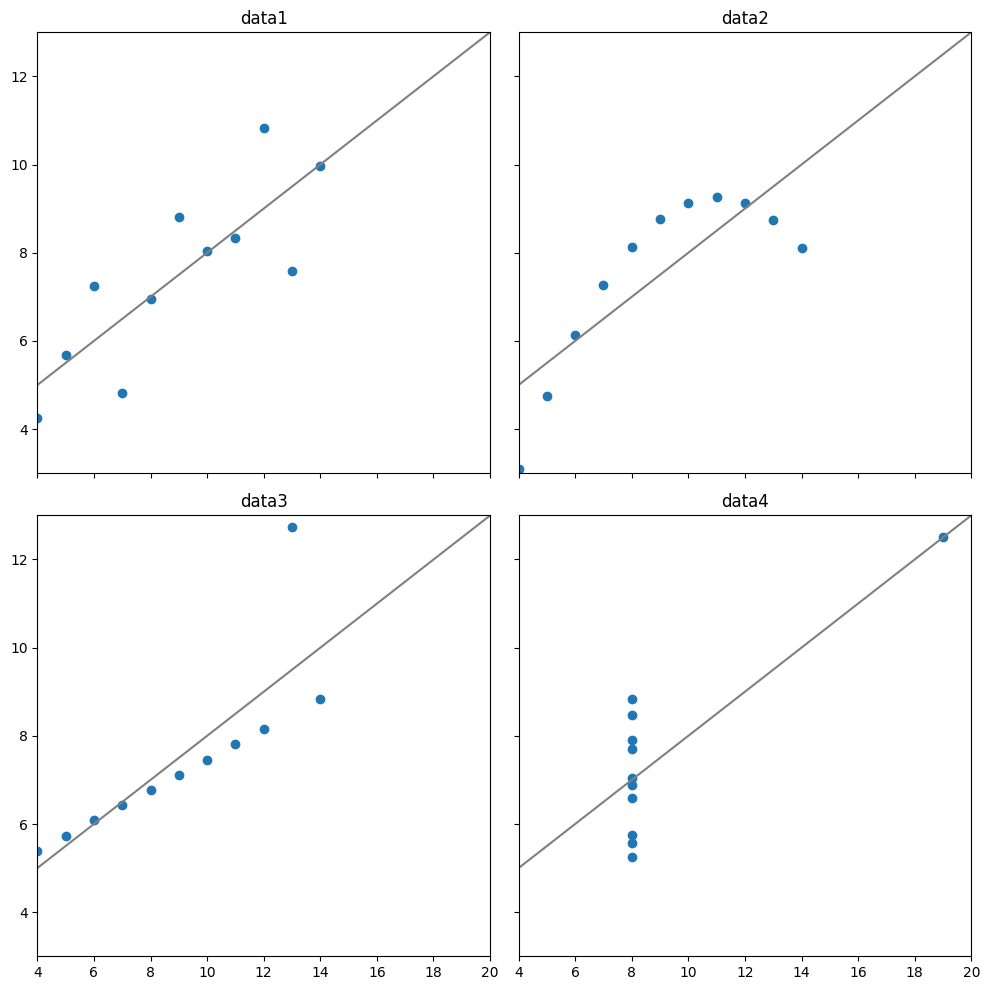

In [22]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)

for i, data in enumerate(anscombe_arr):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()